@author: Octavio Gutiérrez de Código Máquina

URL del canal: https://www.youtube.com/CodigoMaquina

URL del video: https://youtu.be/uaGMk43XTOw

# Algunas Métricas para Clasificadores

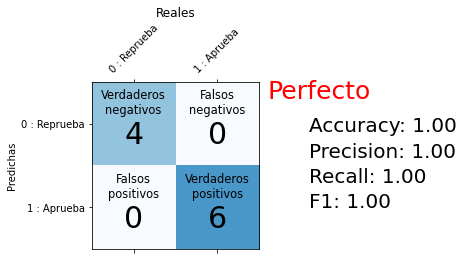

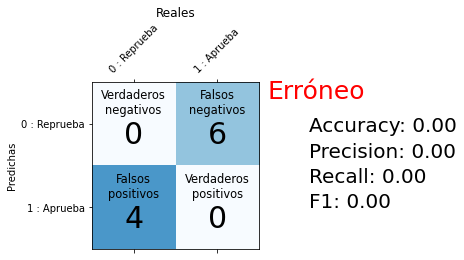

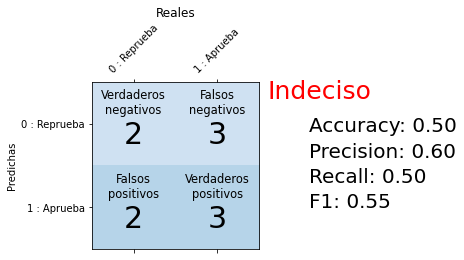

C:\Users\Octavio\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


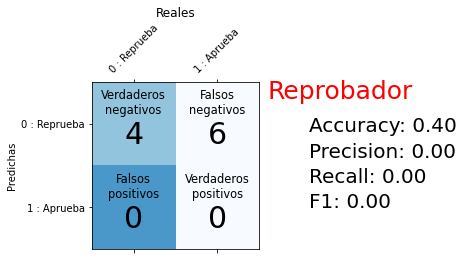

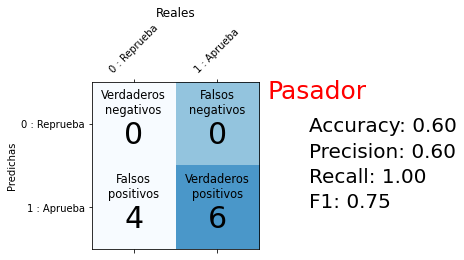

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score 

# Dominio del Ejemplo - Calificaciones en Exámenes
#
# 0 : Reprueba      40% Reprueba
# 1 : Aprueba       60% Aprueba

def metricas(clases_reales, clases_predichas):
    """ Calcular las métricas utilizando sklearn """
    matriz = confusion_matrix(clases_reales, clases_predichas)
    accuracy = accuracy_score(clases_reales, clases_predichas)
    precision = precision_score(clases_reales, clases_predichas)
    recall = recall_score(clases_reales, clases_predichas)
    f1 = f1_score(clases_reales, clases_predichas)
    return matriz, accuracy, precision, recall, f1

def visualiza_metricas(clases_reales, clases_predichas, titulo):
    """ Visualiza la matriz de confusión y métricas """
    
    #Código para calcular las métricas y matriz de confusión
    
    matriz, accuracy, precision, recall, f1 = \
                    metricas(clases_reales, clases_predichas)
    
    #Código de matplotlib para graficar 
    plt.figure(figsize=(3, 3))
    matriz = pd.DataFrame(matriz, 
                          columns=["0 : Reprueba", "1 : Aprueba"])
    plt.matshow(matriz, cmap="Blues", vmin=0, vmax=10, fignum=1)
    plt.title("Reales")
    plt.ylabel("Predichas")
    plt.xticks(range(len(matriz.columns)), matriz.columns, rotation=45)
    plt.yticks(range(len(matriz.columns)), matriz.columns)
    etiquetas = (("Verdaderos\nnegativos", "Falsos\npositivos"),
                 ("Falsos\nnegativos", "Verdaderos\npositivos"))
    for i in range(len(matriz.columns)):
        for j in range(len(matriz.columns)):
            plt.text(i, j + 0.14, str(matriz.iloc[i, j]),
                     fontsize=30, ha="center", va="center")
            plt.text(i, j - 0.25, etiquetas[i][j],
                     fontsize=11.5, ha="center", va="center")           
    plt.text(1.60, -0.30, titulo, fontsize=25, c="red")
    plt.text(2.1, 0.10, "Accuracy: %0.2f" % accuracy, fontsize=20)
    plt.text(2.1, 0.40, "Precision: %0.2f" % precision, fontsize=20)
    plt.text(2.1, 0.70, "Recall: %0.2f" % recall, fontsize=20)
    plt.text(2.1, 1.00, "F1: %0.2f" % f1, fontsize=20)    
    plt.show()
    print("\n" * 10)

print("\n" * 10)

# Dominio del Ejemplo - Calificaciones en Exámenes
#
# 0 : Reprueba      40% Reprueba
# 1 : Aprueba       60% Aprueba

clases_reales = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]

# Clasificador perfecto 
clases_predichas = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
visualiza_metricas(clases_reales, clases_predichas, "Perfecto")

# Clasificador totalmente erróneo
clases_predichas = [1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
visualiza_metricas(clases_reales, clases_predichas, "Erróneo")

# Clasificador indeciso
clases_predichas = [1, 1, 0, 0, 0, 0, 0, 1, 1, 1]
visualiza_metricas(clases_reales, clases_predichas, "Indeciso")

# Clasificador reprobador
clases_predichas = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
visualiza_metricas(clases_reales, clases_predichas, "Reprobador")

# Clasificador pasador
clases_predichas = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
visualiza_metricas(clases_reales, clases_predichas, "Pasador")